# Credit Analysis
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time. Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which emphasizes the impact of risk prediction on both the consumers and banks. This would inform the bank’s decisions on criteria to approve a credit card application and also decide upon what credit limit to provide. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Using the information given, predict the probability of a customer defaulting in the next month.

# Metadata
ID : Unique ID of each client

LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit

SEX : Gender (1=male, 2=female)

EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

AGE : Age of the client

PAY_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 : Repayment status in August, 2005 (scale same as above)

PAY_3 : Repayment status in July, 2005 (scale same as above)

PAY_4 : Repayment status in June, 2005 (scale same as above)

PAY_5 : Repayment status in May, 2005 (scale same as above)

PAY_6 : Repayment status in April, 2005 (scale same as above)

BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6 : Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1 : Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2 : Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3 : Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4 : Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5 : Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6 : Amount of previous payment in April, 2005 (NT dollar)

### Goals 
Our main goal in this project is to predict the wether the customer is going to be default or not. This project could also be use for:
1. Identifying customers who may require closer monitoring to ensure that they do not default on their credit card payments.

2. Making more informed decisions about approving new credit card applications.

3. Identifying trends in credit card default and using this information to improve underwriting and risk management strategies.

4. Improving the overall performance and stability of the financial institution by reducing the risk of credit card default.

5. Helping customers who are at risk of defaulting to take steps to improve their financial situation and avoid default.

### Why is this important?
Predicting credit card default is important because it allows financial institutions to identify potentially high-risk customers and take appropriate actions, such as adjusting credit limits or increasing monitoring, to mitigate potential losses. Additionally, being able to predict credit card default can also help financial institutions make more informed decisions about approving new credit card applications. This can reduce the overall risk of issuing credit to customers who are unlikely to be able to repay their debts, which can help maintain the stability of the financial system.

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load the data file
pd.set_option('display.max_columns', None)
df = pd.read_csv('train_20D8GL3.csv')

In [3]:
# look at top 5 data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


ID is not really important for us so we can remove it later. After removing ID, There are 24 columns, 23 of them are independent variables and 1 is a dependent variable. We also want to rename the target variable

In [4]:
# Remove column ID
df.drop('ID',axis=1,inplace=True)
df.rename(columns={"default_payment_next_month": "DEFAULTED"}, inplace=True)

In [5]:
# Change the label in categorical variable to the actual value
df['SEX'].replace({1: "male",2:"female"},inplace=True)
df['EDUCATION'].replace({1: "graduate school",2:"university",3:"high school",4:"others"},inplace=True)
df['MARRIAGE'].replace({1: "married",2:"single",3:"divorce"},inplace=True)

In [6]:
# Checking the data types of all the columns
df.dtypes

LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
DEFAULTED     int64
dtype: object

All of the columns have int64 data type. For further analysis, we can classify the columns as categorical,numerical, or target variable by manually looking at the metadata.

In [7]:
# Classify the columns
categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
         'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'DEFAULTED'

In [8]:
# Check the descriptive statistics of numeric variables
df[numerical].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


- The maximum credit given to someone is 800000 and the minimum is 10000
- 75% of borrowers are below 41 years old
- The Bill and PAY_AMT related columns appear to have multicollinearity, we need to address this issue later.

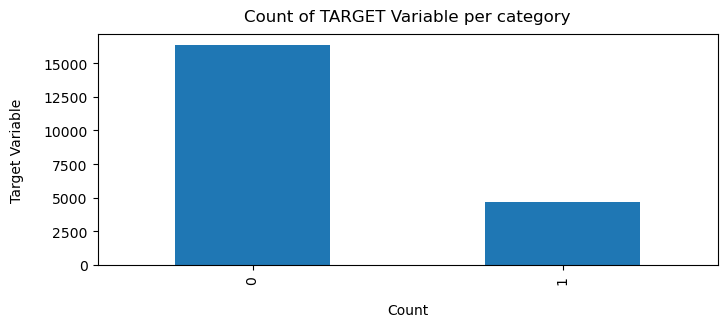

In [9]:
# Make a countplot for target variable
df['DEFAULTED'].value_counts().plot(kind='bar', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [10]:
df['DEFAULTED'].value_counts()/len(df)

0    0.77881
1    0.22119
Name: DEFAULTED, dtype: float64

There is an imbalance in the distribution of the target variable with 78% to 22%.

In [11]:
# Checking for the missing data
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULTED    0
dtype: int64

There is no missing data

In [12]:
def plot(df,col,title):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    temp = pd.Series(data = hue)
    plt.figure(figsize=(0.5, 1))
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df,x=col,palette='bright')
        
    plt.show()

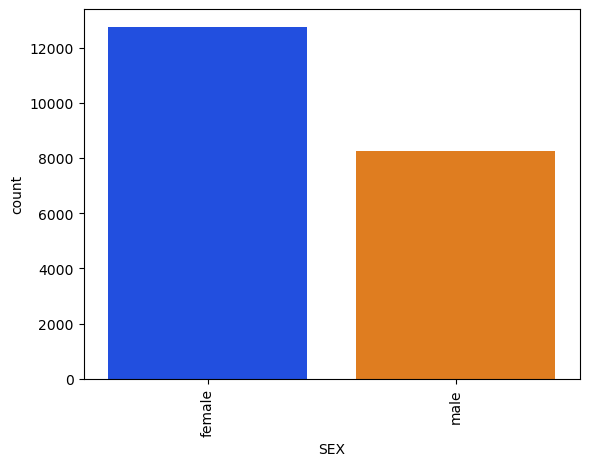

<Figure size 100x100 with 0 Axes>

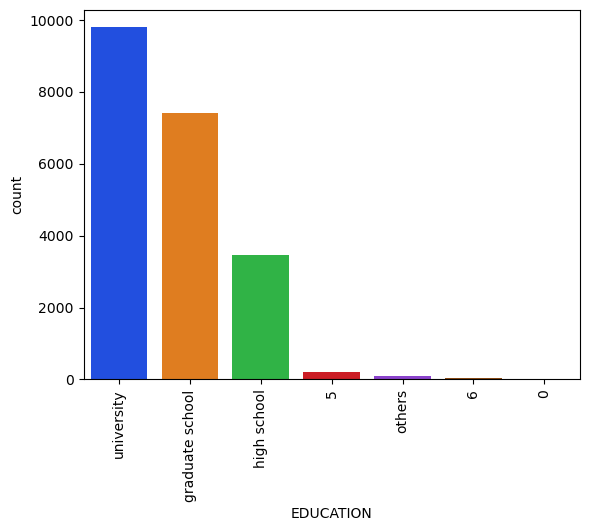

<Figure size 100x100 with 0 Axes>

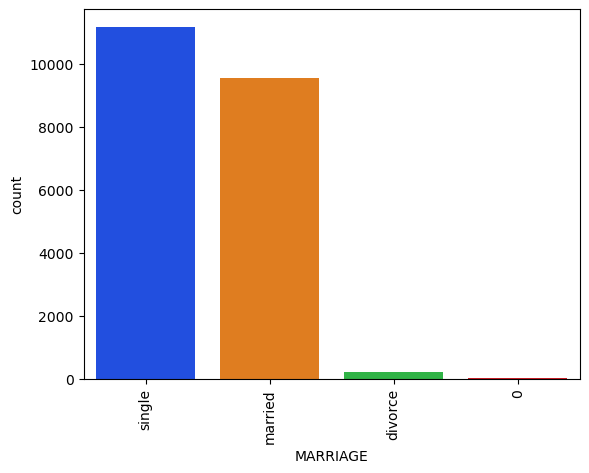

<Figure size 100x100 with 0 Axes>

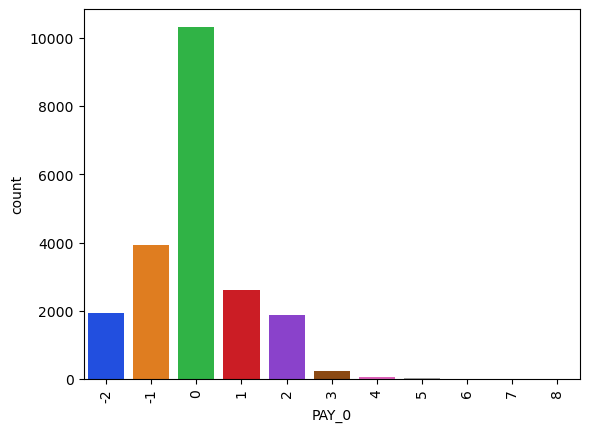

<Figure size 100x100 with 0 Axes>

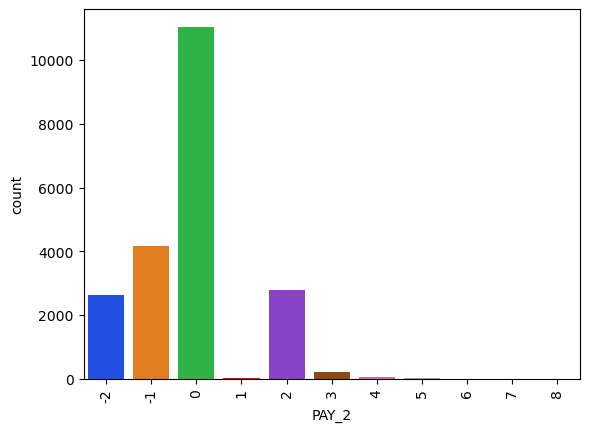

<Figure size 100x100 with 0 Axes>

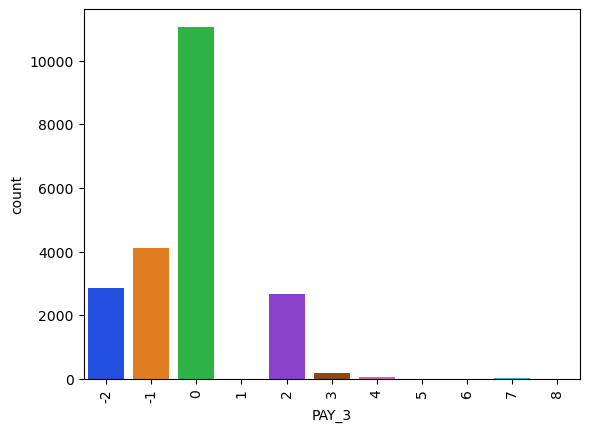

<Figure size 100x100 with 0 Axes>

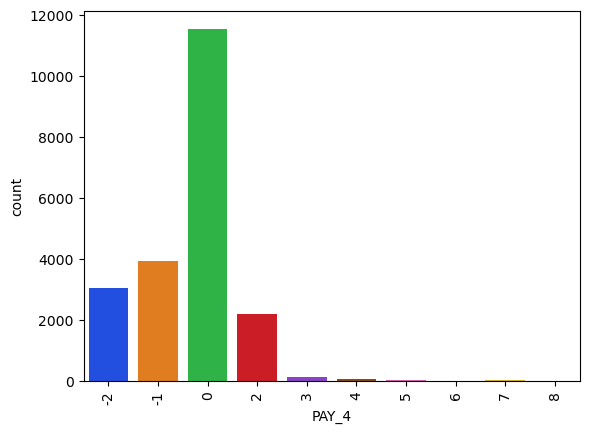

<Figure size 100x100 with 0 Axes>

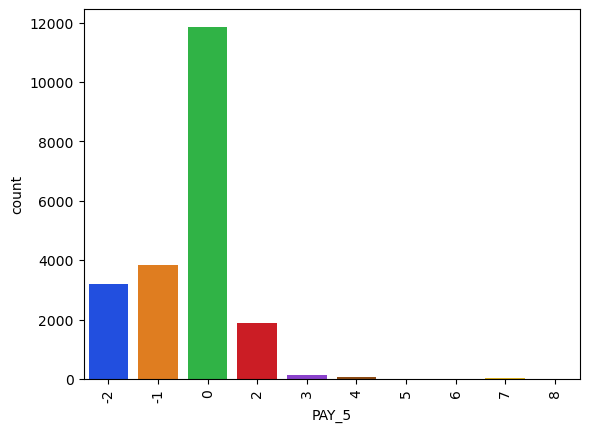

<Figure size 100x100 with 0 Axes>

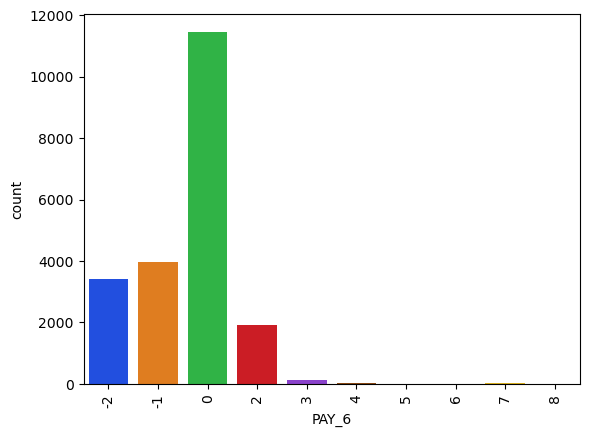

<Figure size 100x100 with 0 Axes>

In [13]:
for c in categorical:
    ax = sns.countplot(data=df,x=c,palette='bright')
    plt.xticks(rotation=90)
    plt.figure(figsize=(1, 1))
    plt.show()

Observation
- There is additional categorical value that is not included in the metadata for example, 0 in marriage and education collumn and -2,0 in pay related column
- For some pay related column there is not 1 value or only a little

In [14]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,360000,female,university,single,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,female,graduate school,single,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,female,university,married,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,female,university,single,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,80000,male,high school,married,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,50000,female,university,single,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
20996,80000,female,university,married,37,0,0,0,0,0,0,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,100000,male,graduate school,married,52,1,2,2,2,0,0,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,90000,female,university,married,47,0,0,0,0,0,0,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


In [15]:
# Lets just encode 0,5, and 6 as others in EDUCATION 
df['EDUCATION']= df['EDUCATION'].apply(lambda x : 'others' if x==0 or x==5 or x==6 else x)

In [16]:
# Lets just replace 0 with the mode in MARRIAGE
df['MARRIAGE'].replace({0:"single"},inplace=True)

In [17]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTED'],
      dtype='object')

In [18]:
# Lets just group -2,-1,0 together as 0 and classify it as pay_duly in pay related column
for c in ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
	df[c]= df[c].apply(lambda x : 0 if x==-2 or x==-1 else x)

In [19]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTED'],
      dtype='object')

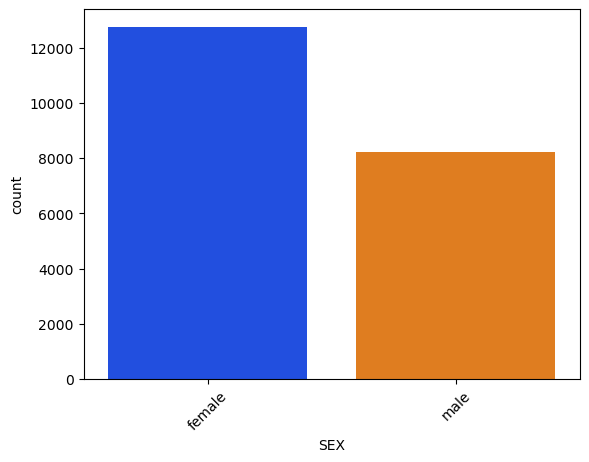

<Figure size 100x100 with 0 Axes>

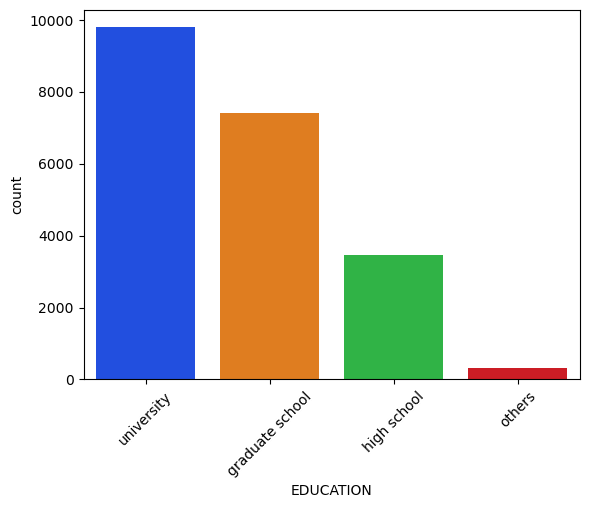

<Figure size 100x100 with 0 Axes>

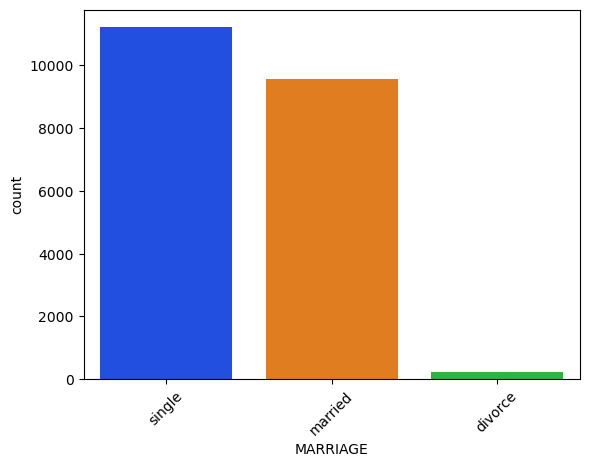

<Figure size 100x100 with 0 Axes>

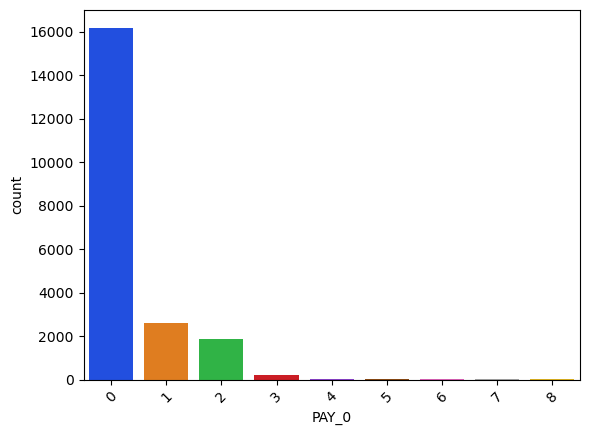

<Figure size 100x100 with 0 Axes>

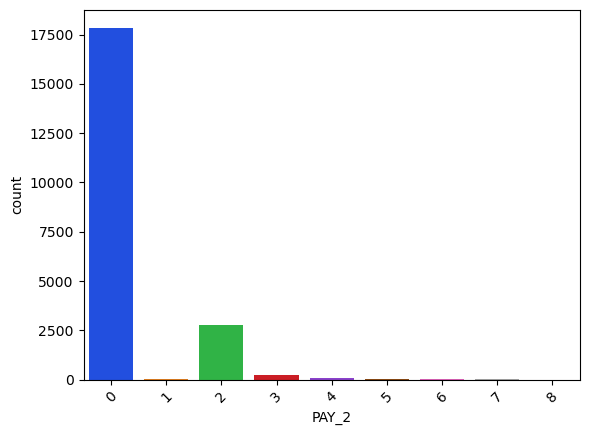

<Figure size 100x100 with 0 Axes>

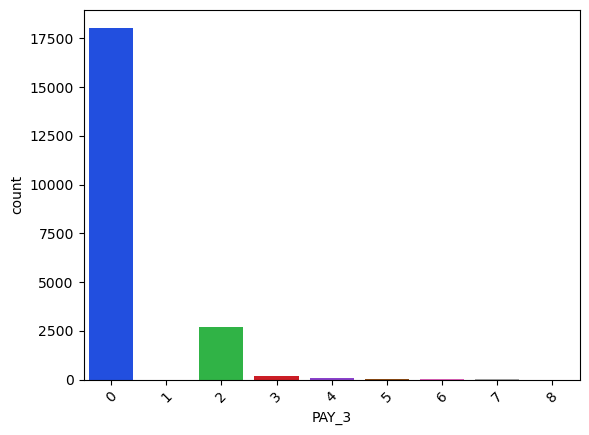

<Figure size 100x100 with 0 Axes>

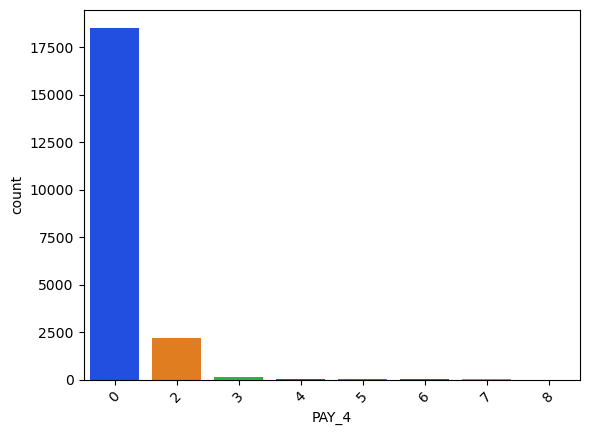

<Figure size 100x100 with 0 Axes>

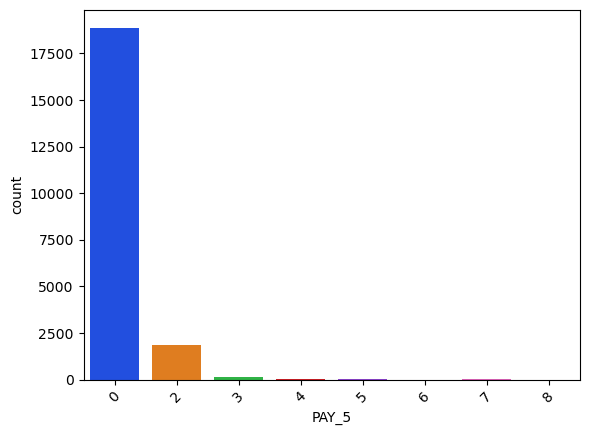

<Figure size 100x100 with 0 Axes>

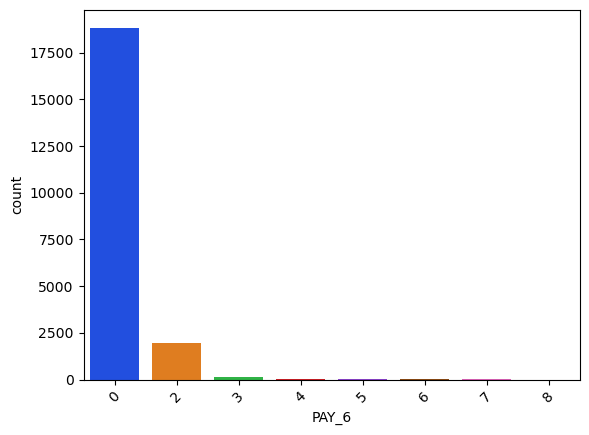

<Figure size 100x100 with 0 Axes>

In [20]:
for c in categorical:
    ax = sns.countplot(data=df,x=c,palette='bright')
    plt.xticks(rotation=45)
    plt.figure(figsize=(1, 1))
    plt.show()

# Data Exploration

### 1. Plot distribution of individual predictors by churn

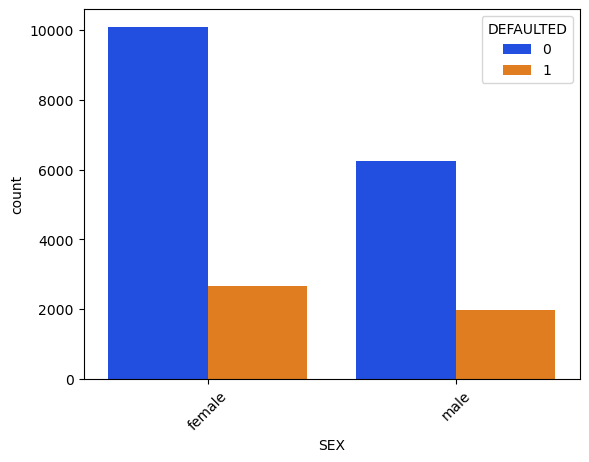

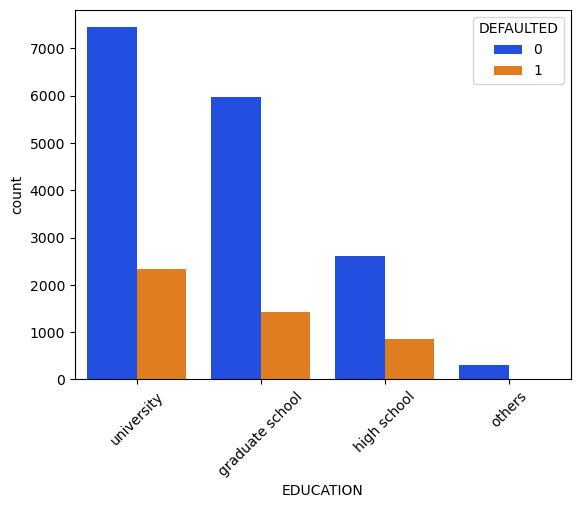

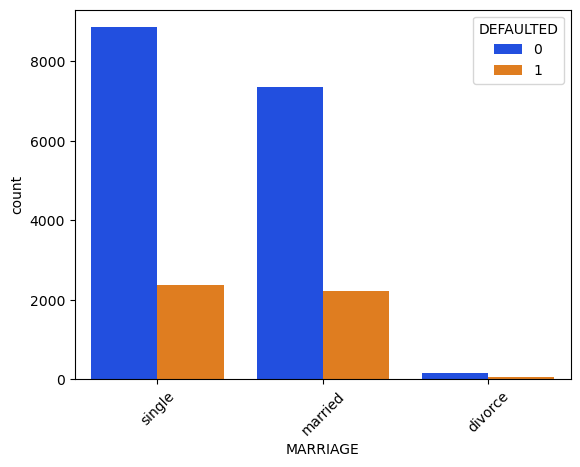

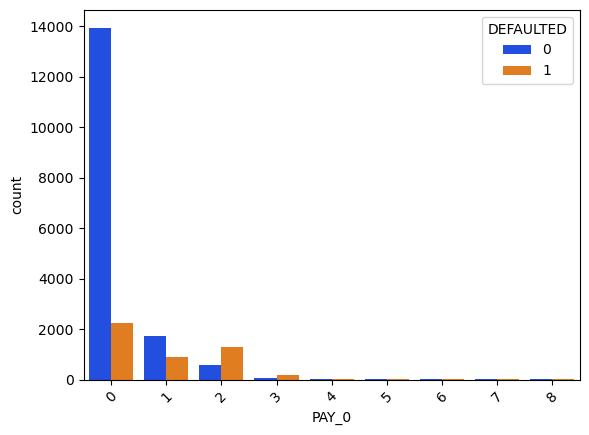

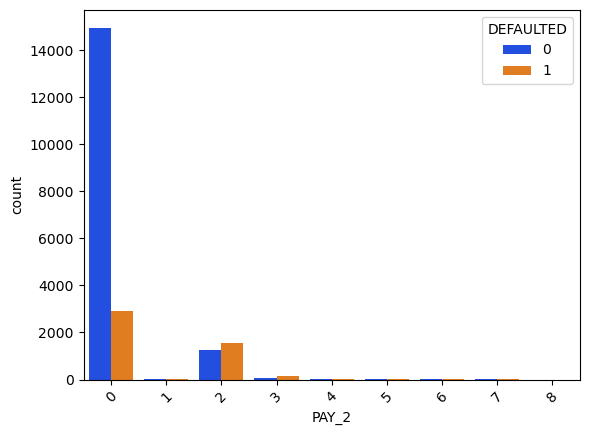

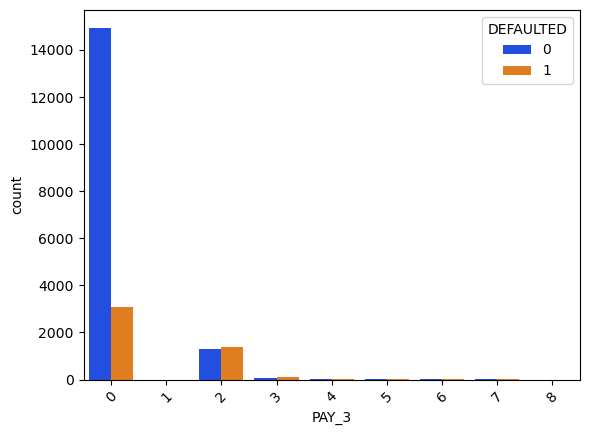

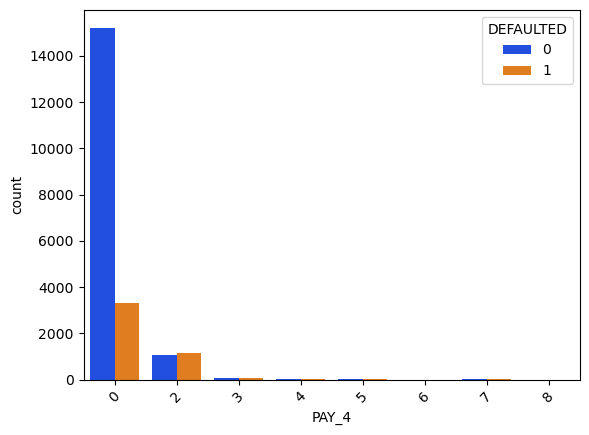

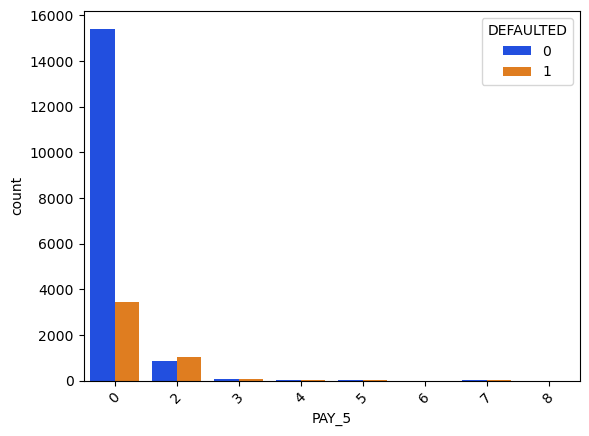

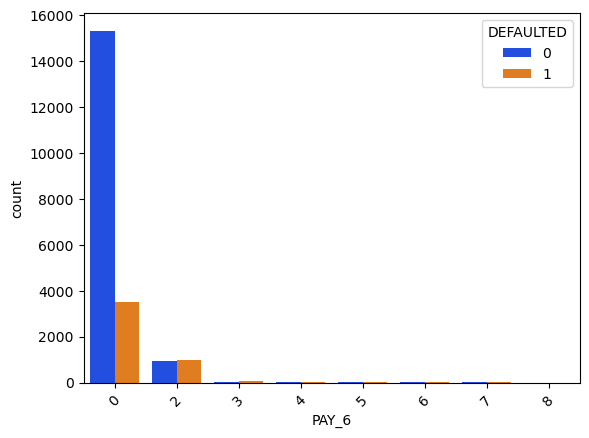

In [21]:
for i, predictor in enumerate(df[categorical]):
    plt.figure(i)
    plt.xticks(rotation=45)
    sns.countplot(data=df, x=predictor, hue='DEFAULTED',palette='bright')

### 2. Relationship between BILL_MEAN and PAY_AMT_MEAN

In [22]:
df['BILL_MEAN'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
df['PAY_AMT_MEAN'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)

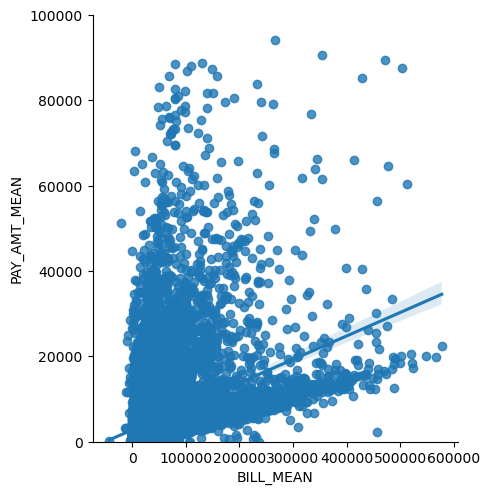

In [23]:
g = sns.lmplot(x = 'BILL_MEAN' , y ='PAY_AMT_MEAN' , data = df)
g.set(ylim=(0, 100000))

There is not high correlation between PAY_AMT_MEAN and BILL_MEAN

### 3.Build a corelation of all predictors with 'Churn'

<AxesSubplot: >

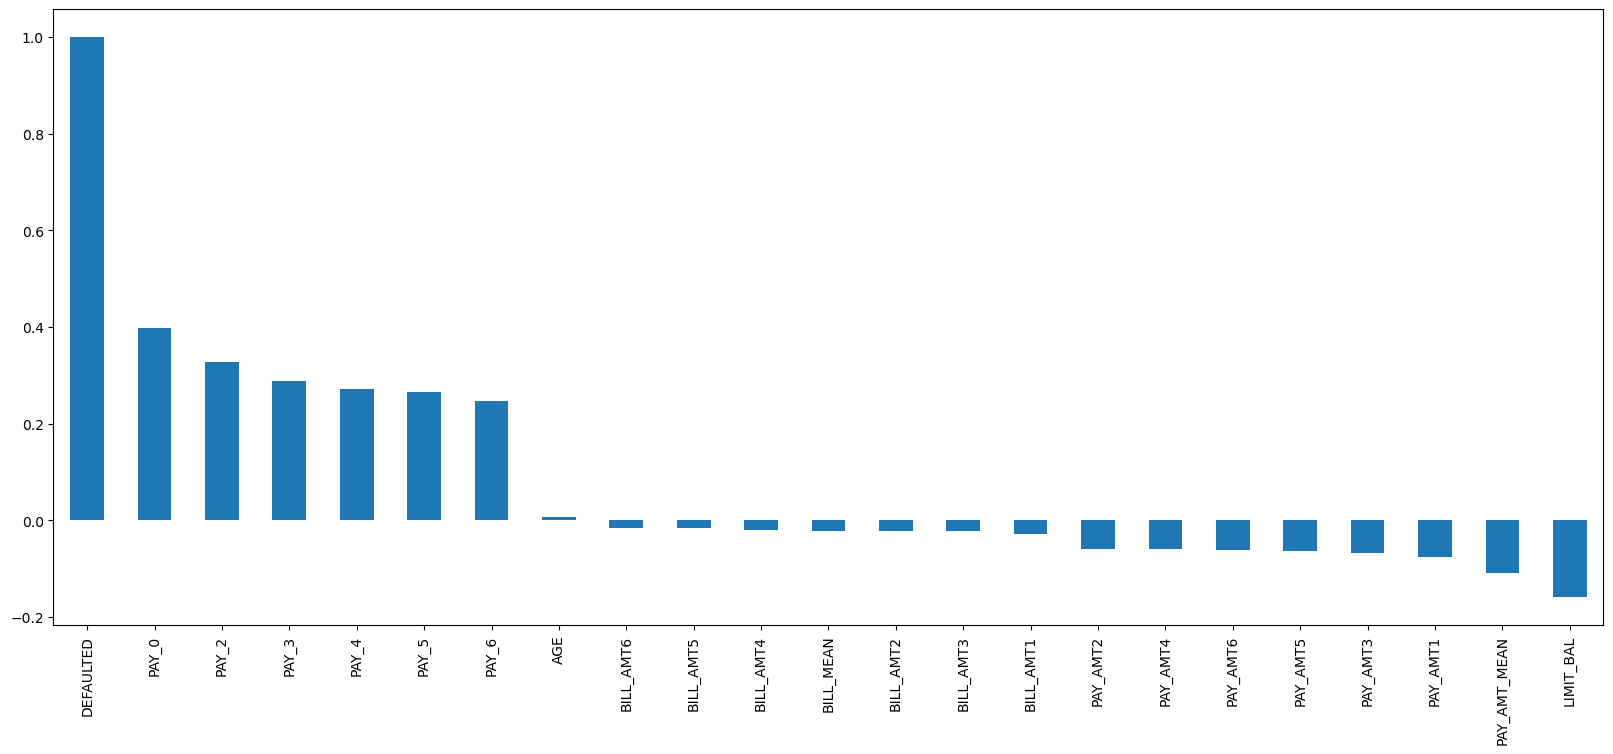

In [24]:
plt.figure(figsize=(20,8))
df.corr()['DEFAULTED'].sort_values(ascending = False).plot(kind='bar')

HIGH Default seen in case Pay related columns

LOW Default is seens in case of LIMIT_BAL and PAY_AMT related columns

Factors like Age and BILL related columns have almost NO impact on Churn

<AxesSubplot: >

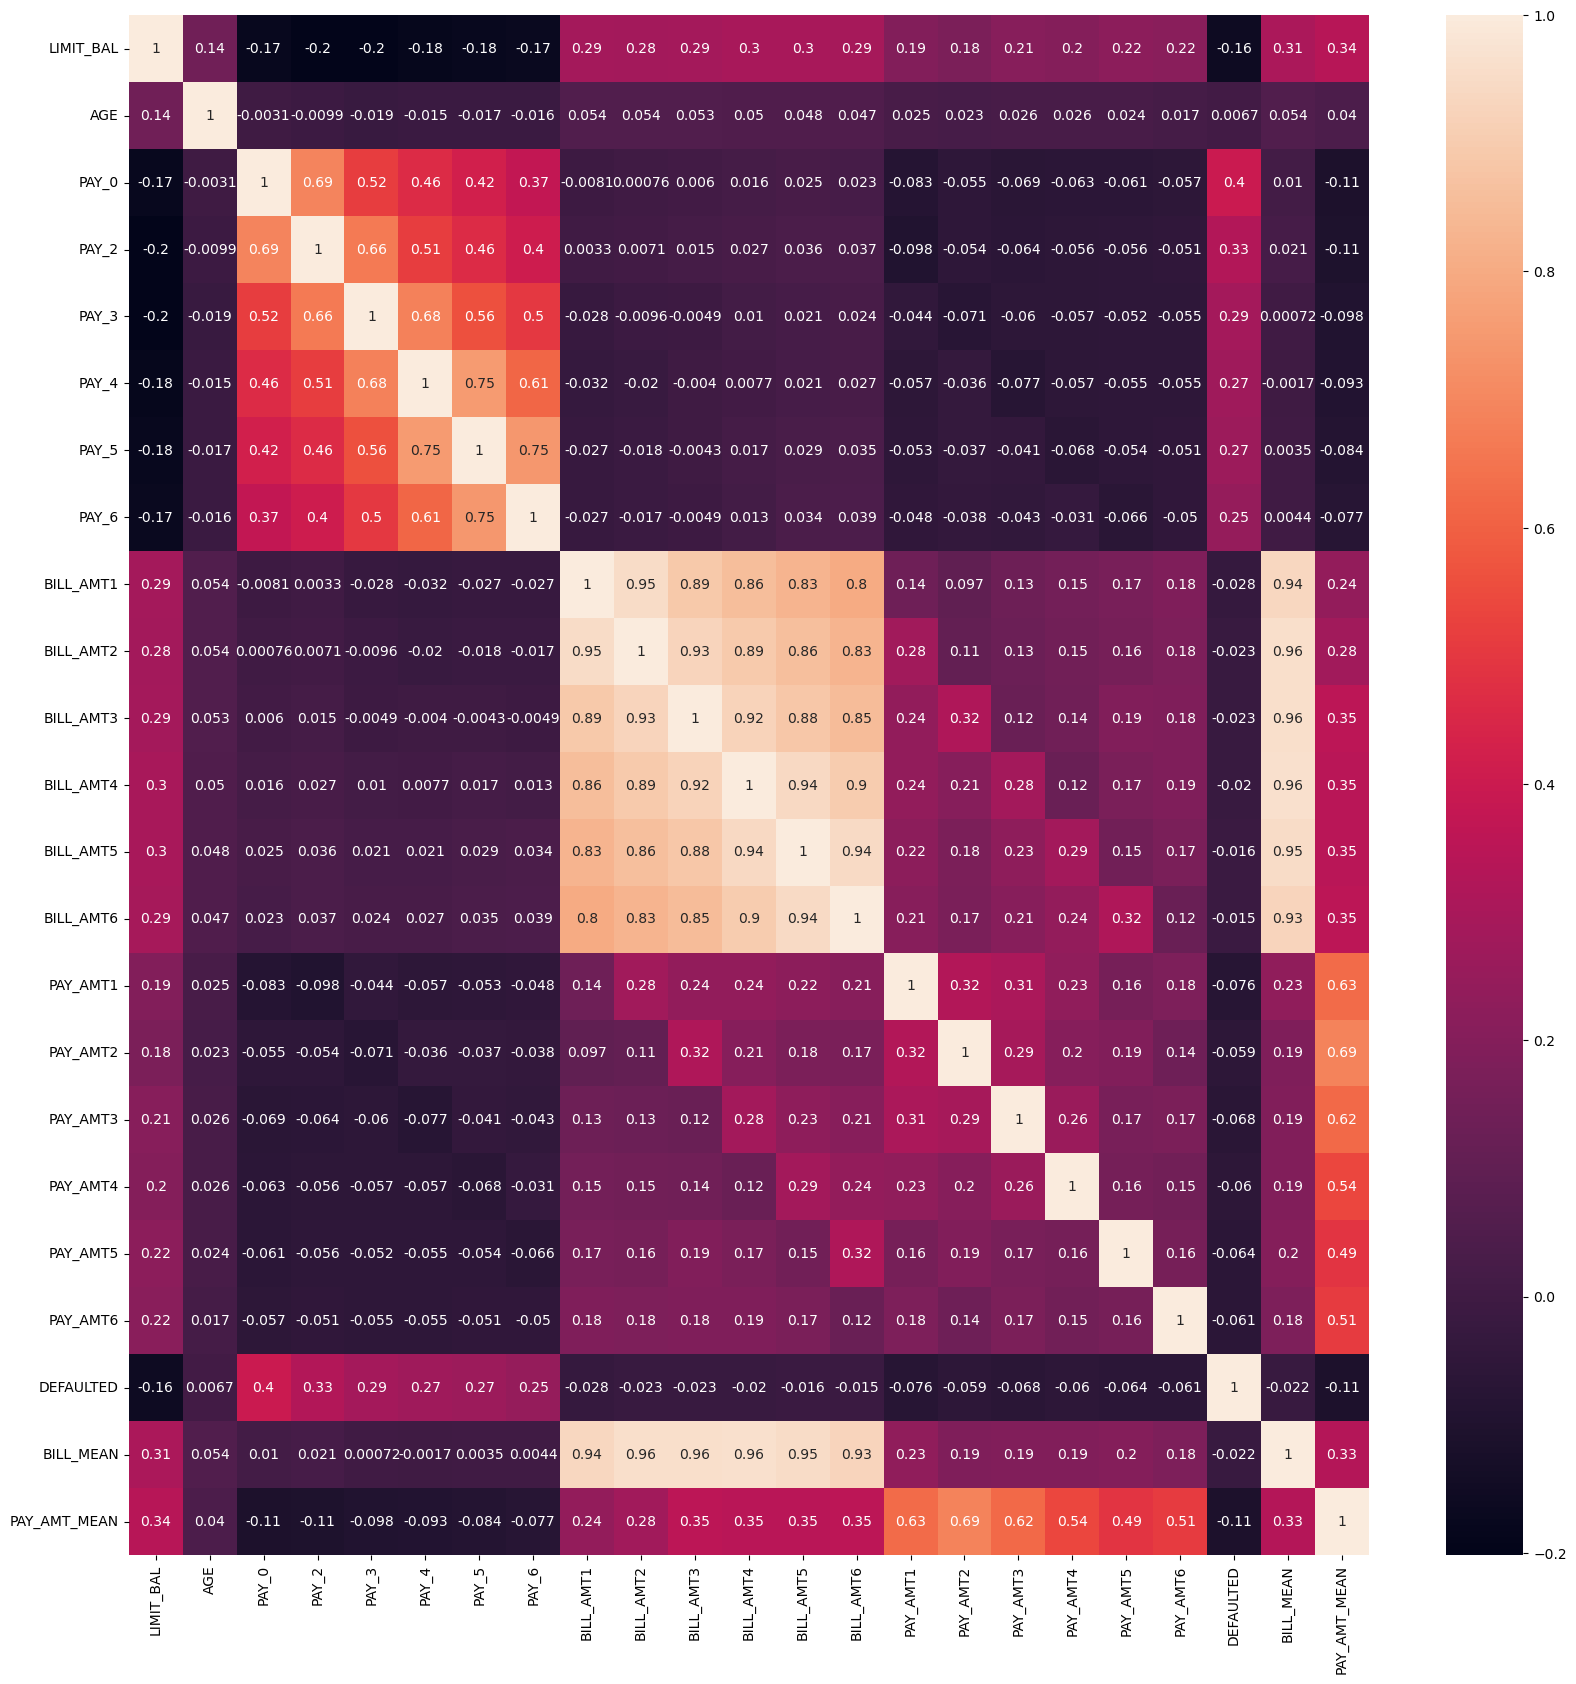

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In the bill related column are correlated with each other so we can  use BILL_MEAN instead to avoid multicolinearity. To reduce number of features we also can use PAY_AMT_MEAN and only use PAY_0

In [26]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULTED',
       'BILL_MEAN', 'PAY_AMT_MEAN'],
      dtype='object')

In [27]:
df.drop(['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
         'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
       ,axis=1,inplace=True)

In [28]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,DEFAULTED,BILL_MEAN,PAY_AMT_MEAN
0,360000,female,university,single,25,0,0,8557.666667,9574.666667
1,240000,female,graduate school,single,46,2,0,1107.333333,1263.500000
2,320000,female,university,married,41,0,0,41459.666667,2750.000000
3,50000,female,university,single,24,0,1,445.833333,0.000000
4,80000,male,high school,married,52,0,0,22841.000000,1308.833333


In [29]:
df.to_csv('train_cleaned.csv',index=False) 